<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Feature Selection for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Subsurface Machine Learning: Feature Ranking for Subsurface Data Analytics 

Here's a demonstration of feature ranking for subsurface modeling in Python. This is part of my Subsuface Machine Learning Course at the Cockrell School of Engineering at the University of Texas at Austin.  

* check out the associated recorded lecture for more details on these methods, [Feature Selection Lecture](https://www.youtube.com/watch?v=5Q0gemu-h3Q).

#### Feature Selection / Variable Ranking

There are often many predictor features, input variables, available for us to work with for subsurface prediction. There are good reasons to be selective, throwing in every possible feature is not a good idea! In general, for the best prediction model, careful selection of the fewest features that provide the most amount of information is the best practice. 

Here's why:

* more variables result in more complicated workflows that require more professional time and have increased opportunity for blunders
* higher dimensional feature sets are more difficult to visualize
* more complicated models may be more difficult to interrogate, interpret and QC
* inclusion of highly redundant and colinear variables increases model instability and decreases prediction accuracy in testing
* more variables generally increase the computational time required to train the model and the model may be less compact and portable
* the risk of overfit increases with the more variables, more complexity

#### What is Feature Ranking?

Feature ranking is a set of metrics that assign relative importance or value to each feature with respect to information contained for inference and importance in predicting a response feature. There are a wide variety of possible methods to accomplish this. My recommendation is a **'wide-array'** approach with multiple analyses and metrics, while understanding the assumptions and limitations of each method.  

Here's the general types of metrics that we will consider for feature ranking.

1. Visual Inspection of Data Distributions and Scatter Plots
2. Statistical Summaries
3. Model-based
4. Recursive Feature Elimination 

Also, we should not neglect expert knowledge.  If additional information is known about physical processes, causation, reliability and availability of features this should be integrated into assigning feature ranks.

#### Objective 

In the Stochastic Machine Learning class, I want to provide hands-on experience with solving complicated subsurface modeling problems with data analytics, machine learning. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

There are examples below with GeostatsPy functions. You can go here to see a list of the available functions, https://git.io/fh4eX, and for other example workflows and source code. 

In [1]:
import geostatspy.GSLIB as GSLIB                        # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                  # GSLIB methods convert to Python        

In [2]:
import numpy
numpy.__version__

'1.21.5'

In [3]:
import sys
#!{sys.executable} -m pip install --user numpy==1.21

We will also need some standard packages. These should have been installed with Anaconda 3.

In [4]:
import numpy as np                                      # ndarrys for gridded data
import pandas as pd                                     # DataFrames for tabular data
import os                                               # set working directory, run executables
import matplotlib.pyplot as plt                         # for plotting
from matplotlib.colors import ListedColormap            # custom color maps
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                 # summary statistics
import math                                             # trigonometry etc.
import scipy.signal as signal                           # kernel for moving window calculation
import random                                           # for randon numbers
import seaborn as sns                                   # for matrix scatter plots
from scipy import linalg                                # for linear regression
from sklearn import preprocessing                       # remove encoding error
from sklearn.feature_selection import RFE               # for recursive feature selection
from sklearn.feature_selection import mutual_info_regression # mutual information
from sklearn.linear_model import LinearRegression       # linear regression model
from sklearn.ensemble import RandomForestRegressor      # model-based feature importance
from statsmodels.stats.outliers_influence import variance_inflation_factor # variance inflation factor
plt.rc('axes', axisbelow=True)                          # girds and axes behind all plot elements
cmap = plt.cm.inferno                                   # default colormap

#### Design Custom Color Map

Accounting for significance by masking nonsignificant values

* for demonstration only currently, could be updated for each plot based on results confidence and uncertainty

In [5]:
my_colormap = plt.cm.get_cmap('RdBu_r', 256)            # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))         # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])        # define white color (4 channel)
#newcolors[26:230, :] = white                           # mask all correlations less than abs(0.8)
#newcolors[56:200, :] = white                           # mask all correlations less than abs(0.6)
newcolors[76:180, :] = white                            # mask all correlations less than abs(0.4)
signif = ListedColormap(newcolors)                      # assign as listed colormap
  
my_colormap = plt.cm.get_cmap('inferno', 256)           # make a custom colormap
newcolors = my_colormap(np.linspace(0, 1, 256))         # define colormap space
white = np.array([250/256, 250/256, 250/256, 1])        # define white color (4 channel)
#newcolors[26:230, :] = white                           # mask all correlations less than abs(0.8)
newcolors[0:12, :] = white                              # mask all correlations less than abs(0.6)
#newcolors[86:170, :] = white                           # mask all correlations less than abs(0.4)
sign1 = ListedColormap(newcolors)                       # assign as listed colormap

Here's a couple of functions to assist with calculating metrics for ranking and other plots:

* **partial_corr** - partial correlation coefficient

* **semipar_corr** - semipartial correlation coefficient

* **mutual_matrix** - mutual information matrix, matrix of all pairwise mutual information

* **mutual_information_objective** - my modified version of the MRMR loss function (Ixy - average(Ixx)) for feature ranking (uses all other predictor features)

* **delta_mutual_information_quotient** - change in mutual information quotient by adding and rmeove a specific feature (uses all other predictor features for the comparison) 

* **weighted_avg_and_std** - average and standard deviation account for data weights

* **weighted_percentile** - percentile accounting for data weights

* **histogram_bounds** - add confidence intervals to histograms

Here are the functions:

In [6]:
def partial_corr(C):                                    # partial correlation by Fabian Pedregosa-Izquierdo, f@bianp.net
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

def semipartial_corr(C):                                # Michael Pyrcz modified the function above by Fabian Pedregosa-Izquierdo, f@bianp.net for semipartial correlation
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] 
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

def mutual_matrix(df,features):                         # calculate mutual information matrix
    mutual = np.zeros([len(features),len(features)])
    for i, ifeature in enumerate(features):
        for j, jfeature in enumerate(features):
            if i != j:
                mutual[i,j] = mutual_info_regression(df.iloc[:,i].values.reshape(-1, 1),np.ravel(df.iloc[:,j].values))[0]
    mutual /= np.max(mutual) 
    for i, ifeature in enumerate(features):
        mutual[i,i] = 1.0
    return mutual

def mutual_information_objective(x,y):                  # modified from MRMR loss function, Ixy - average(Ixx)
    mutual_information_quotient = []
    for i, icol in enumerate(x.columns):
        Vx = mutual_info_regression(x.iloc[:,i].values.reshape(-1, 1),np.ravel(y.values.reshape(-1, 1)))
        Ixx_mat = []
        for m, mcol in enumerate(x.columns):
            if i != m:
                Ixx_mat.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(x.iloc[:,i].values.reshape(-1, 1))))
        Wx = np.average(Ixx_mat)
        mutual_information_quotient.append(Vx/Wx)
    mutual_information_quotient  = np.asarray(mutual_information_quotient).reshape(-1)
    return mutual_information_quotient

def delta_mutual_information_quotient(x,y):             # standard mutual information quotient
    delta_mutual_information_quotient = []               
    
    Ixy = []
    for m, mcol in enumerate(x.columns):
        Ixy.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(y.values.reshape(-1, 1))))
    Vs = np.average(Ixy)
    Ixx = []
    for m, mcol in enumerate(x.columns):
        for n, ncol in enumerate(x.columns):
            Ixx.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(x.iloc[:,n].values.reshape(-1, 1))))
    Ws = np.average(Ixx) 
    
    for i, icol in enumerate(x.columns):          
        Ixy_s = []                                          
        for m, mcol in enumerate(x.columns):
            if m != i:
                Ixy_s.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(y.values.reshape(-1, 1))))
        Vs_s = np.average(Ixy_s)
        Ixx_s = []
        for m, mcol in enumerate(x.columns):
            if m != i:
                for n, ncol in enumerate(x.columns):
                    if n != i:
                        Ixx_s.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(x.iloc[:,n].values.reshape(-1, 1))))                  
        Ws_s = np.average(Ixx_s)
        delta_mutual_information_quotient.append((Vs/Ws)-(Vs_s/Ws_s))
    
    delta_mutual_information_quotient  = np.asarray(delta_mutual_information_quotient).reshape(-1)  
    return delta_mutual_information_quotient

def weighted_avg_and_std(values, weights):              # calculate weighted statistics (Eric O Lebigot, stack overflow)
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def weighted_percentile(data, weights, perc):           # calculate weighted percentile (iambr on StackOverflow @ https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy/32216049) 
    ix = np.argsort(data)
    data = data[ix] 
    weights = weights[ix] 
    cdf = (np.cumsum(weights) - 0.5 * weights) / np.sum(weights) 
    return np.interp(perc, cdf, data)

def histogram_bounds(values,weights,color):             # add uncertainty bounds to a histogram          
    p10 = weighted_percentile(values,weights,0.1); avg = np.average(values,weights=weights); p90 = weighted_percentile(values,weights,0.9)
    plt.plot([p10,p10],[0.0,45],color = color,linestyle='dashed')
    plt.plot([avg,avg],[0.0,45],color = color)
    plt.plot([p90,p90],[0.0,45],color = color,linestyle='dashed')

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [7]:
#os.chdir("d:/PGE383")                                   # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

**Dataset**:

0 - subsurface energy dataset, multiple wells in space with multiple features
1 - 

In [8]:
dataset = 0

if dataset == 0:
    #df = pd.read_csv('unconv_MV_v4.csv')               # load our data table
    df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv') # load data from Dr. Pyrcz's GitHub respository
    #df = df.rename(columns={'Production':'Prod'})
    response = 'Prod'

    x = df.copy(deep = True); x = x.drop(response,axis='columns')
    Y = df.loc[:,response]
    
    pred = x.columns
    resp = Y.name
    
    xmin = [6.0,0.0,1.0,10.0,0.0,0.9]; xmax = [24.0,10.0,5.0,85.0,2.2,2.9]
    Ymin = 500.0; Ymax = 9000.0
    
    predlabel = ['Porosity (%)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Brittleness Ratio (%)',
                 'Total Organic Carbon (%)','Vitrinite Reflectance (%)']
    resplabel = 'Normalized Initial Production (MCFPD)'
    
    predtitle = ['Porosity','Permeability','Acoustic Impedance','Brittleness Ratio',
                 'Total Organic Carbon','Vitrinite Reflectance']
    resptitle = 'Normalized Initial Production'
        
    

In [9]:
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624


Visualizing the DataFrame would be useful and we already learned about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [10]:
df.head(n=13)                                           # we could also use this command for a table preview 

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4017.374438
6,7,13.49,3.60,2.93,63.71,0.80,1.85,2952.812773
7,8,11.58,3.03,3.25,53.00,0.69,1.93,2670.933846
8,9,12.52,2.72,2.43,65.77,0.95,1.98,2474.048178
9,10,13.25,3.94,3.71,66.20,1.14,2.65,2722.893266


This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%) 
2. permeability (mD)
3. accoustic impedance (kg/m2s*10^6)
4. brittness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships.

Ranking features is really an effort to understand the features and their relationships with eachother.  We will start with basic data visualization and move to more complicated methods such are partial correlation and recursive feature elimination.

### Ranking Method - Coverage

Let's start with the concept of feature coverage. 

* If a feature is available over a small proportion of the samples then we may not want to include it as it will result in issues with feature imputation, estimation of missing data.

* By removing a couple features with poor coverage we may improve our model because there are limitations with feature imputation, feature imputation can actually impose bias in statistics and additional error in our prediction models

* if likewise deletion is applied to deal with missing values, features with low coverage result in a lot of removed data!

Let's start with a bar chart with the proportion of missing records:

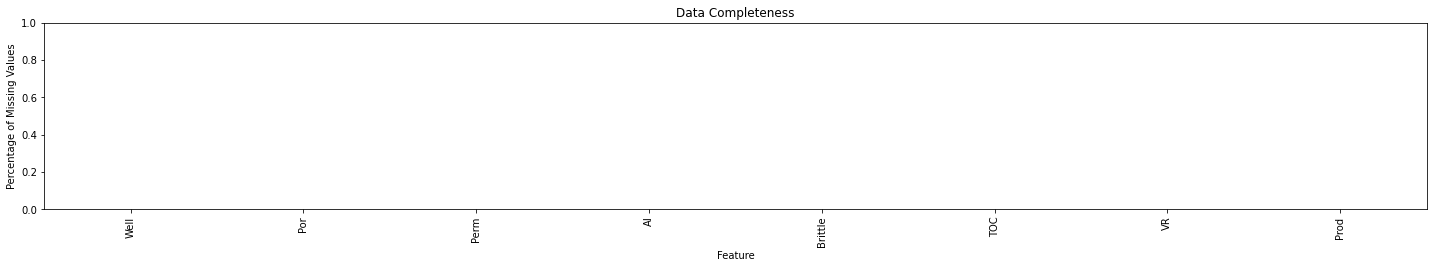

In [11]:
plt.subplot(311)
(df.isnull().sum()/len(df)).plot(kind = 'bar')          # calculate DataFrame with percentage missing by feature
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Values'); plt.title('Data Completeness'); plt.ylim([0.0,1.0])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()

For the provided example dataset the plot should be empty. There are no missing data so the 'Proportion of Missing Records' is 0.0 for all features. 

If you wanted to test this plot with some missing data, run this code first:

```python
proportion_NaN = 0.1                                    # proportion of values in DataFrame to remove

remove = np.random.random(df.shape) < proportion_NaN    # make the boolean array for removal
print('Fraction of removed values in mask ndarray = ' + str(round(remove.sum()/remove.size,3)) + '.')

df_mask = df.mask(remove)                               # make a new DataFrame with specified proportion removed
```

Remove the code and reload the data to continue.

This does not tell the whole story. For example, if 20% of feature A is missing and 20% of feature B is missing are those the same and different samples. This has a huge impact if you perform likewise deletion.

If there is not too much data then we can actually visualize data coverage over all samples and features in a boolean table like this.

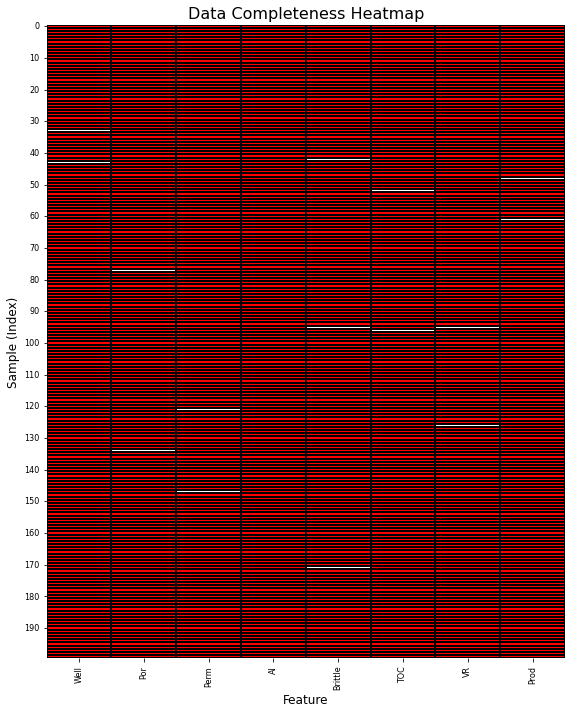

In [12]:
add_missing_data = True
if add_missing_data == True:                           # randomly remove data
    prop_missing = 0.005
    df = df.mask(np.random.random(df.shape)<prop_missing)


df_temp = df.copy(deep=True)                            # make a deep copy of the DataFrame
df_bool = df_temp.isnull()                              # true is value, false if NaN
#df_bool = df_bool.set_index(df_temp.pop('UWI'))        # set the index / feature for the heat map y column
heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f',cbar=False,linecolor='black',linewidth=0.1) # make the binary heat map, no bins
heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=8)
heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=8)
 
heat.set_title('Data Completeness Heatmap',fontsize=16); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=12)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()

Once again this plot should be quite boring for the provided dataset with perfect coverage, every cell should be filled in red. 

* add the code to remove some records to test this plot. White cells are missing records.

#### Feature Imputation

I don't cover feature imputation here.

* check out my Python well-documented demonstration of methods for [Feature Imputation](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Imputation.ipynb)

We will just apply likewise delection and move on.

* we remove all samples with any missing feature values. While this is quite simple, it is a sledge hammer approach to ensure perfect coverage required by feature ranking methods that we are about to demonstrate. Please check out the other methods in the linked workflow above.

In [13]:
df.dropna(axis=0,how='any',inplace=True)                # likewise deletion

### Ranking Method - Summary Statistics

In any multivariate work we should start with the univariate analysis, summary statistics of one variable at a time. The summary statistic ranking method is qualitative, we are asking:

* are there data issues?
* do we trust the features? do we we trust the features all equally?
* are there issues that need to be taken care of before we develop any multivariate workflows?

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a compact data table. We use transpose() command to flip the table so that features are on the rows and the statistics are on the columns.

In [14]:
df.describe().transpose()                               # DataFrame summary statistics

,count,mean,std,min,25%,50%,75%,max
Well,186.0,101.290323,58.769376,1.000000,51.250000,102.500000,152.75000,200.000000
Por,186.0,15.017419,2.983683,6.550000,12.950000,15.070000,17.48750,23.550000
Perm,186.0,4.380806,1.745452,1.130000,3.145000,4.060000,5.37000,9.870000
AI,186.0,2.962473,0.567543,1.280000,2.532500,2.965000,3.34000,4.630000
Brittle,186.0,48.293441,14.176516,10.940000,38.042500,49.355000,58.28750,84.330000
TOC,186.0,0.993333,0.484745,-0.040000,0.605000,1.030000,1.35750,2.180000
VR,186.0,1.958710,0.303039,0.930000,1.770000,1.950000,2.13250,2.870000
Prod,186.0,3868.829750,1551.873581,839.822063,2689.623548,3604.303506,4705.83437,8590.384044


Summary statistics are a critical first step in data checking. 

* this includes the number of valid (non-null) values for each feature (count removes all np.NaN from the totals for each variable).

* we can see the general behavoirs such as central tendency, mean, and dispersion, variance. 

* we can identify issue with negative values, extreme values, and values that are outside the range of plausible values for each property. 

We have some negative TOC values! Let's check the distribution.

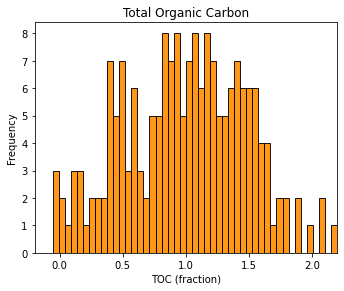

In [15]:
plt.subplot(111)
GSLIB.hist_st(df['TOC'].values,-.2,2.2,log=False,cumul = False,bins=50,weights = None,xlabel='TOC (fraction)',title='Total Organic Carbon')
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7, top=0.8, wspace=0.1, hspace=0.2)
plt.show()

    There are just a couple slighly negative values, let's just truncate them at zero. We   can use this command below to set all TOC values in the DataFrame that are less than 0.0 as 0.0, otherwise we keep the original TOC value.

In [16]:
df['TOC'] = np.where(df['TOC']<0.0, 0.0, df['TOC'])     # set TOC < 0.0 as 0.0, otherwise leave the same
df['TOC'].describe().transpose()                        # summary statistics just for TOC

count    186.000000
mean       0.993925
std        0.483502
min        0.000000
25%        0.605000
50%        1.030000
75%        1.357500
max        2.180000
Name: TOC, dtype: float64

* We can also establish the feature ranges for plotting.  We could calculate the feature range directly from the data with code like this:

```p
Pormin = np.min(df['Por'].values)          # extract ndarray of data table column
Pormax = np.max(df['Por'].values)          # and calculate min and max
```

but, this would not result in easy to understand color bars and axis scales, let's pick convenient round numbers. We will also declare feature labels for ease of plotting. 

#### Set Up Lists to Assist with Our Workflow

We build lists with names, units, minimum and maximum values for all features.

In [17]:
if dataset == 0:
    response = 'Prod'
    
    x = df.copy(deep = True); x = x.drop(['Well',response],axis='columns')
    Y = df.loc[:,response]
    
    features = x.columns.values.tolist() + [Y.name]
    pred = x.columns.values.tolist()
    resp = Y.name
    
    xmin = [6.0,0.0,1.0,10.0,0.0,0.9]; xmax = [24.0,10.0,5.0,85.0,2.2,2.9]
    Ymin = 500.0; Ymax = 9000.0
    
    predlabel = ['Porosity (%)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Brittleness Ratio (%)',
                 'Total Organic Carbon (%)','Vitrinite Reflectance (%)']
    resplabel = 'Normalized Initial Production (MCFPD)'
    
    predtitle = ['Porosity','Permeability','Acoustic Impedance','Brittleness Ratio',
                 'Total Organic Carbon','Vitrinite Reflectance']
    resptitle = 'Normalized Initial Production'
    
    featurelabel = predlabel + [resplabel]
    featuretitle = predtitle + [resptitle]

The data looks to be in pretty good shape and for brevity we skip outlier detection. Let's look at the distributions.

### Ranking Method - Univariate Distributions

As with summary statistics, this ranking method is a qualitative check for issues with the data and to assess our confidence with each feature. It is better to not include a feature with low confidence of quality as it may be misleading (while adding to model complexity as discussed previously).  

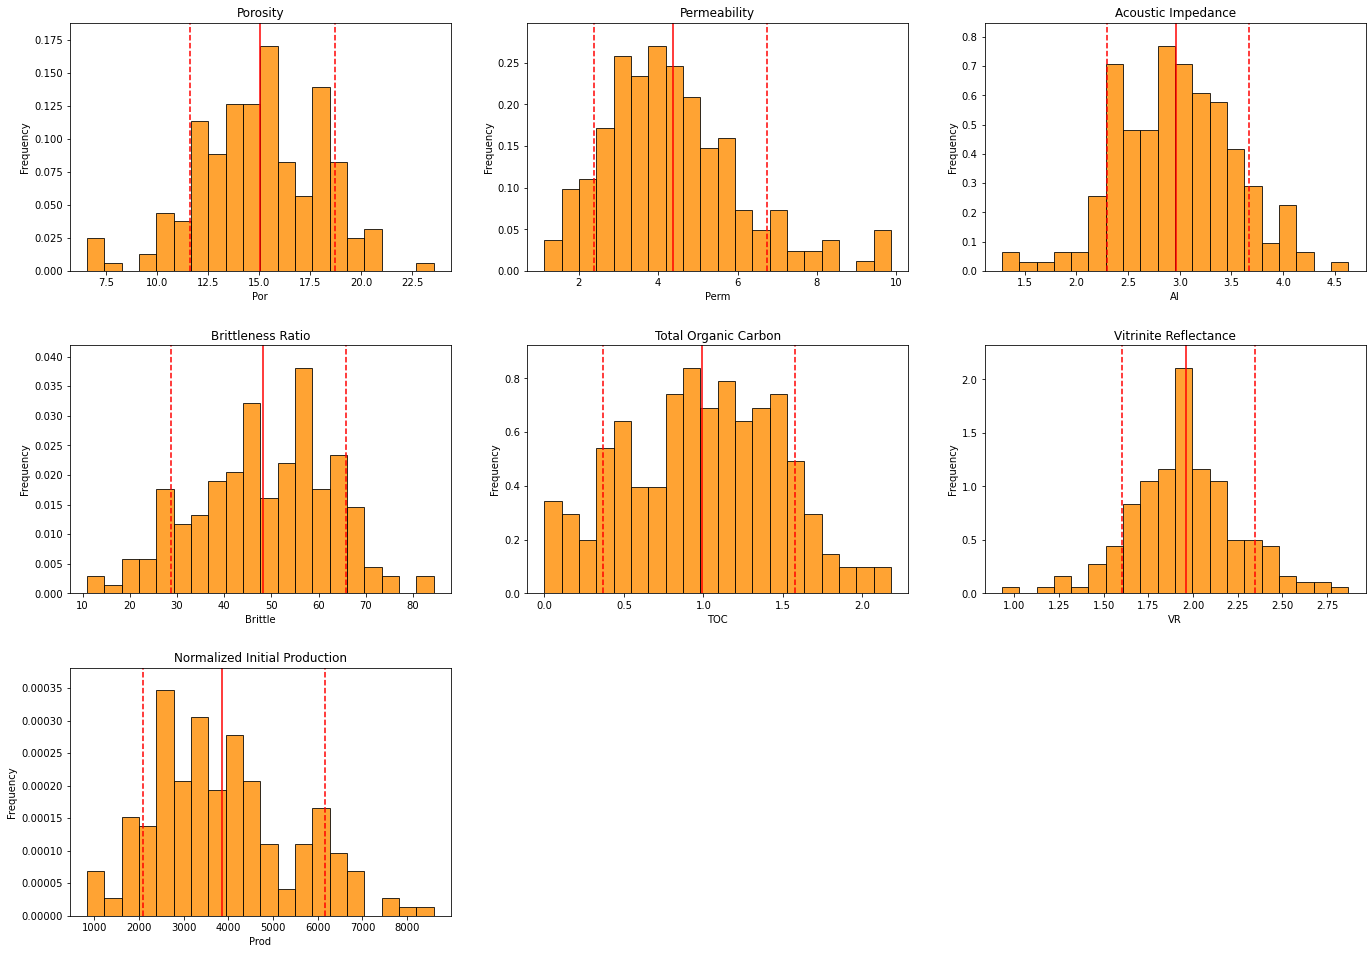

In [18]:
nbins = 20                                            # number of histogram bins

for i, feature in enumerate(features):                # plot histograms with central tendancy and P10 and P90 labelled
    plt.subplot(3,3,i+1)
    y,_,_ = plt.hist(x=df[feature],weights=None,bins=nbins,alpha = 0.8,edgecolor='black',color='darkorange',density=True)
    histogram_bounds(values=df[feature].values,weights=np.ones(len(df)),color='red')
    plt.xlabel(feature); plt.ylabel('Frequency'); plt.ylim([0.0,y.max()*1.10])
    plt.title(featuretitle[i])                     

plt.subplots_adjust(left=0.0, bottom=0.0, right=3., top=3.1, wspace=0.2, hspace=0.3)
plt.show()

The univariate distributions look good:

* there are no obvious outliers
* the permeability is postively skewed as often observed
* the corrected TOC has a small spike, but it's reasonable

### Ranking Method - Bivariate Distributions

Matrix scatter plots are a very efficient method to observe the bivarate relationships between the variables.  

* this is another opportunity through data visualization to identify data issues
* we can assess if we have collinearity, specifically simpler form between two features at a time. 

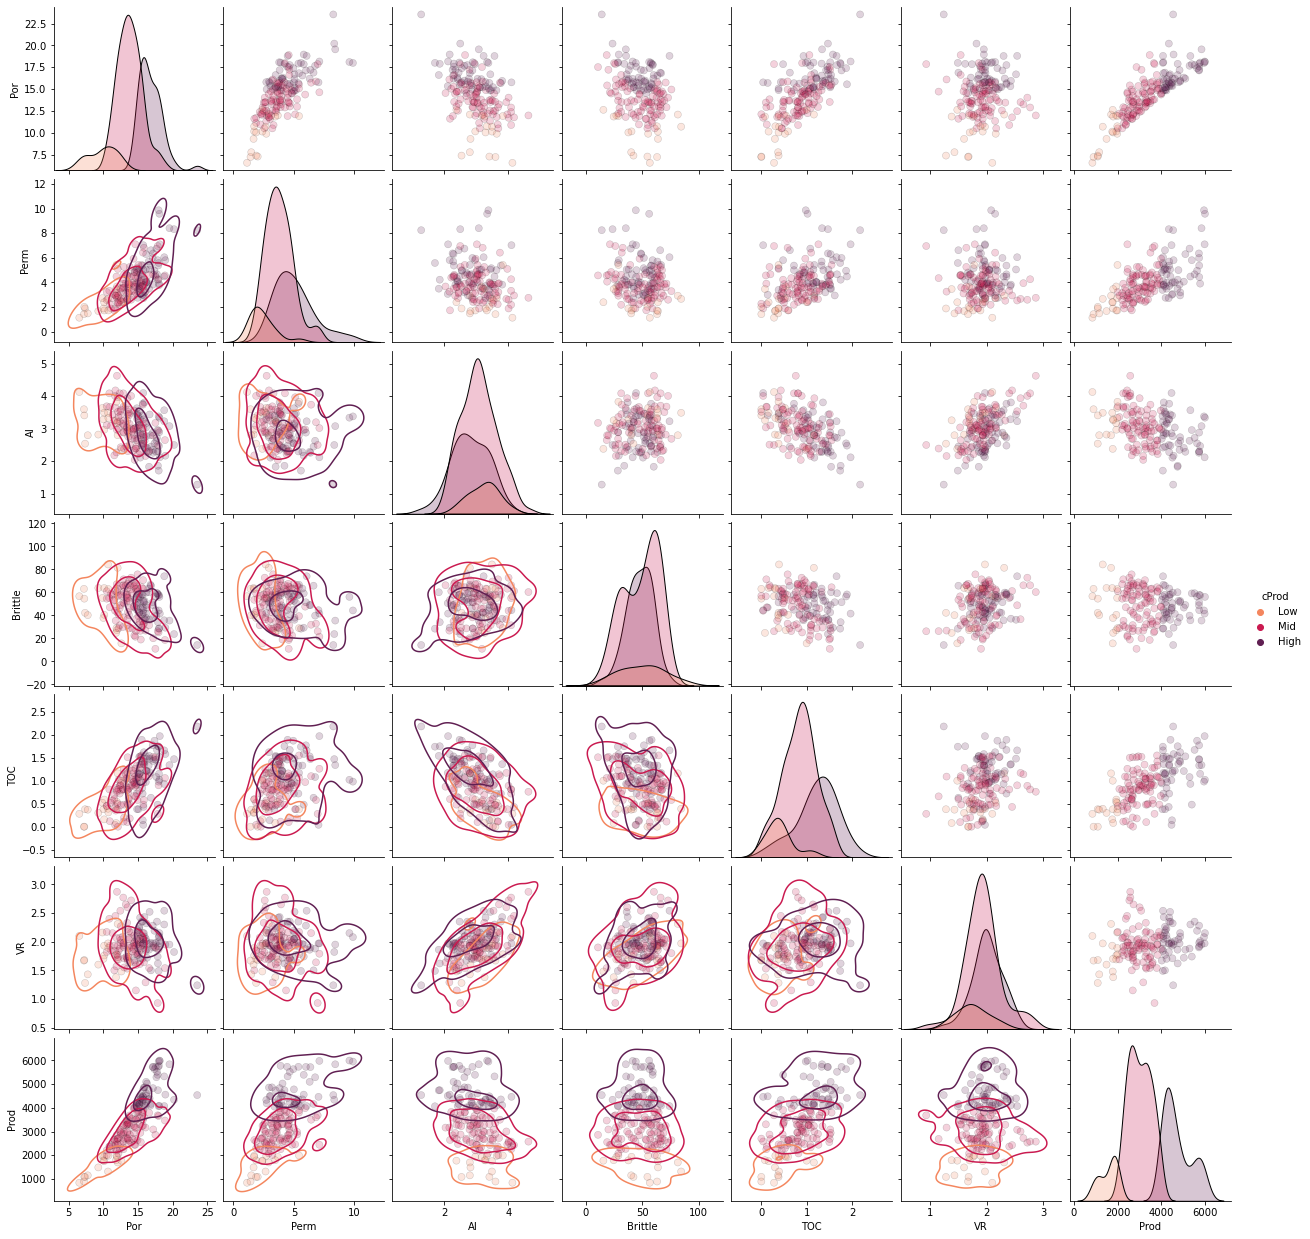

In [19]:
df['c' + resp] = pd.cut(x=df[resp], bins=[0, 2000, 4000, 6000], # make a truncated response cateogorical feature
                     labels=['Low', 'Mid', 'High'])

nsample = len(df)                                       # set to less than number of samples for a speed up

dpalette = sns.color_palette("rocket_r",n_colors = 3)   # matrix scatter plot with points and density estimator
palette = sns.color_palette("rocket")
matrixplot = sns.pairplot(df.sample(n=nsample),vars=features,hue ='c'+resp,diag_kind = 'kde',palette = dpalette,diag_kws={'edgecolor':'black'},plot_kws=dict(s=50, edgecolor="black", linewidth=0.5,alpha=0.2))
matrixplot.map_lower(sns.kdeplot, levels=3, color="black")
#plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.2, hspace=0.3)
plt.show()

This plot communicates a lot of information. How could we use this plot for variable ranking?

* we can identify variables that are closely related to eachother.  e.g. if two variables have almost a perfect monotonic linear or near linear relationship we should remove one immediately.  This is a simple case of colinearity that will likley result in model instability as discussed above.

* we can check for linear vs. non-linear relationships.  If we observe nonlinear bivariate relationships this will impact the choice of methods, and the quality of results from methods that assume linear relationships for variable ranking.

* we can identify constraint relationships and heteroscedasticity between variables. Once again these may restrict our ranking methods and also encourage us to retains specific features to retain these features in the resulting model. 

Yet, we must remember that bivariate visualization and analysis is not sufficient to understand all the multivariate relationships in the data. Multicollinearity includes strong linear relationships between 2 or more features. These may be hard to see with only bivariate plots.

### Ranking Method - Pairwise Covariance

Pairwise covariance provides a measure of the strength of the linear relationship between each predictor feature and the response feature. At this point, we specify that the goal of this study is to predict production, our response variable, from the other available predictor features.  We are thinking predictively now, not inferentially, we want to estimate the function, $\hat{f}$, to accomplish this:

\begin{equation}
Y = \hat{f}(X_1,\ldots,X_n) 
\end{equation}

where $Y$ is our response feature and $X_1,\ldots,X_n$ are our predictor features.  If we retained all of our predictor features to predict the response we would have: 

\begin{equation}
Prod = \hat{f}(Por,Perm,AI,Brittle,TOC,VR) 
\end{equation}

Now back to the covariance, the covariance is defined as:  

\begin{equation}
C_{xy}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{(n-1)}
\end{equation}

Covariance:
* measures the linear relationship
* sensitive to the dispersion / variance of both the predictor and response

We can use the follow command to build a covariance matrix:

```p
df.iloc[:,1:8].cov()                                    # covariance matrix sliced predictors vs. response
```
the output is a new Pandas DataFrame, so we can slice the last column to get a Pandas series (ndarray with names) with the covariances between all predictors features and the response.


In [20]:
covariance = df.iloc[:,1:8].cov().iloc[6,:6]            # calculate covariance matrix and slice for only pred - resp
print(covariance)

Por        4060.284360
Perm       1922.594373
AI         -319.875278
Brittle   -1239.860561
TOC         482.710793
VR          111.171062
Name: Prod, dtype: float64


The covariance is useful, but as you can see the magnitude is quite variable. Most importantly these magnitudes are a function of each feature's variance. Feature variance is somewhat arbitrary. For example, what is the variance of porosity in fraction vs. percentage or permeaiblity in Darcy vs. milliDarcy. We can show that if we apply a constant multiplier, $c$, to a variable, $X$, that the variance will change according to this relationship (the proof is based on expectation formulation of variance):

\begin{equation}
\sigma_{cX}^2 = c^2 \cdot \sigma_{X}^2
\end{equation}

By moving from percentage to fraction we decrease the variance of porosity by a factor of 10,000! The variance of each variable is potentially arbitrary, with the exception when all the features are in the same units. 

Pairwise correlations avoids this issue. 

### Ranking Method - Pairwise Correlation Coefficient

Pairwise correlation coefficient provides a measure of the strength of the linear relationship between each predictor feature and the response feature.  

\begin{equation}
\rho_{xy}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{(n-1)\sigma_x \sigma_y}, \, -1.0 \le \rho_{xy} \le 1.0
\end{equation}

The correlation coefficient:

* measures the linear relationship
* removes the sensitiviety to the dispersion / variance of both the predictor and response features, by normalizing by the product of the standard deviation of each feature 

We can use the follow command to build a correlation matrix:

```p
df.iloc[:,1:8].corr()
```
the output is a new Pandas DataFrame, so we can slice the last column to get a Pandas series (ndarray with names) with the correlations between all predictors features and the response.


In [21]:
correlation = df.iloc[:,1:8].corr().iloc[6,:6]          # calculate correlation matrix and slice for only pred - resp
print(correlation)

Por        0.876895
Perm       0.709779
AI        -0.363183
Brittle   -0.056357
TOC        0.643328
VR         0.236394
Name: Prod, dtype: float64


This is interesting. 

* We see that porosity, permeability and total organic carbon have the strongest linear relationships with production. 
* Acoustic impedance has weak negative relationships with production.
* Brittleness is very close to 0.0. If you review the brittleness vs. production scatterplot, you'll observe a complicated non-linear relationship. There is a brittleness ratio sweetspot for production (rock that is not too soft nor too hard)!

We could also look at the full correlation matrix to evaluate the potential for redudancy between predictor features.

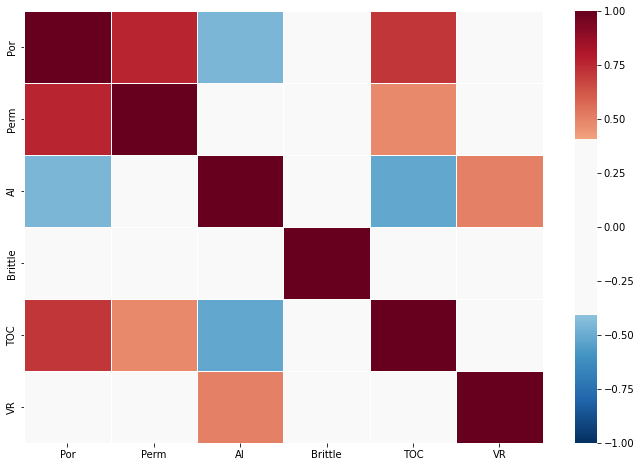

In [22]:
plt.subplot(111)                                        # plot correlation matrix with significance colormap
sns.heatmap(df.iloc[:,1:7].corr(),vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f',cmap = signif)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

Some observations:

* strong degree of correlation between porosity and permeability and porosity and TOC

* strong degree of negative correlation between TOC and acoustic impedance

We are still limited to a strick linear relationship.  The rank correlation allows us to relax this assumption.

### Ranking Method - Pairwise Spearman Rank Correlation Coefficient

The rank correlation coefficient applies the rank transform to the data prior to calculating the correlation coefficent. To calculate the rank transform simply replace the data values with the rank $R_x = 1,\dots,n$, where $n$ is the maximum value and $1$ is the minimum value. 

\begin{equation}
\rho_{R_x R_y}  = \frac{\sum_{i=1}^{n} (R_{x_i} - \overline{R_x})(R_{y_i} - \overline{R_y})}{(n-1)\sigma_{R_x} \sigma_{R_y}}, \, -1.0 \le \rho_{xy} \le 1.0
\end{equation}

\begin{equation}
x_\alpha, \, \forall \alpha = 1,\dots, n, \, | \, x_i \ge x_j \, \forall \, i \gt j 
\end{equation}

\begin{equation}
R_{x_i} = i
\end{equation}

The rank correlation:

* measures the monotonic relationship, relaxes the linear assumption
* removes the sensitiviety to the dispersion / variance of both the predictor and response, by normalizing by the product of the standard deviation of each. 

We can use the follow command to build a rank correlation matrix and calculate the p-value:

```p
stats.spearmanr(df.iloc[:,1:8])
```
the output is a new Pandas DataFrame, so we can slice the last column to get a Pandas series (ndarray with names) with 
the correlations between all predictors features and the response.

Also, we get a very convenient *pval* 2D ndarry with the two-sided (two-tail summing semmetric over both tails) p-value for a hypothesis test with: 

\begin{equation}
H_o: \rho_{R_x R_y} = 0
\end{equation}

\begin{equation}
H_1: \rho_{R_x R_y} \ne 0
\end{equation}

Let's keep the p-values between all the predictor features and our response feature.

In [23]:
rank_correlation, rank_correlation_pval = stats.spearmanr(df.iloc[:,1:8]) # calculate the range correlation coefficient
rank_correlation = rank_correlation[:,6][:6]
rank_correlation_pval = rank_correlation_pval[:,6][:6]
print(rank_correlation)
print(rank_correlation_pval)

[ 0.90039536  0.6980573  -0.37642697 -0.09646951  0.65507053  0.25954986]
[2.03858675e-68 1.70333042e-28 1.18859171e-07 1.90244375e-01
 3.56373972e-24 3.46987613e-04]


There are some interesting results:

* we almost doubled the correlation between Brittleness and Production be relaxing the linear assumption, of course it is still low due to the monotonic assumption in with the rank correlation.
* we increased the correlation between porosity and production. See the slightly curve in the porosity and production constraint.
* only the brittleness vs. production rank correlation coefficient is not significantly different than zero

All of these methods up to now have considered one variable at a time. We can also consider methods that consider all features jointly to 'isolate' the influence of each feature.

### Ranking Method - Partial Correlation Coefficient

This is a linear correlation coefficient that controls for the effects all the remaining variables, $\rho_{XY.Z}$ and $\rho_{YX.Z}$ is the partial correlation between $X$ and $Y$, $Y$ and $X$, after controlling for $Z$.

To calculate the partial correlation coefficient between $X$ and $Y$ given $Z_i, \forall \quad i = 1,\ldots, m-1$ remaining features we use the following steps:

1. perform linear, least-squares regression to predict $X$ from $Z_i, \forall \quad i = 1,\ldots, m-1$. $X$ is regressed on the predictors to calculate the estimate, $X^*$

2. calculate the residuals in Step \#1, $X-X^*$, where $X^* = f(Z_{1,\ldots,m-1})$, linear regression model

3. perform linear, least-squares regression to predict $Y$ from $Z_i, \forall \quad i = 1,\ldots, m-1$. $Y$ is regressed on the predictors to calculate the estimate, $Y^*$

4. calculate the residuals in Step #3, $Y-Y^*$, where $Y^* = f(Z_{1,\ldots,m-1})$, linear regression model

5. calculate the correlation coefficient between the residuals from Steps #2 and #4, $\rho_{X-X^*,Y-Y^*}$

The partial correlation, provides a measure of the linear relationship between $X$ and $Y$ while controlling for the effect of $Z$ other features on both, $X$ and $Y$.  We use the function declared previously taken from Fabian Pedregosa-Izquierdo, f@bianp.net. The original code is on GitHub at https://git.io/fhyHB.

To use this method we must assume:

1. two variables to compare, $X$ and $Y$
2. other variables to control, $Z_{1,\ldots,m-2}$ 
3. linear relationships between all variables
4. no significant outliers
5. approximately bivariate normality between the variables

We are in pretty good shape, but we have some departures from bivariate normality.  We could consider Gaussian univariate transforms to improve this.  This option is provided later.

In [24]:
partial_correlation = partial_corr(df.iloc[:,1:8]) # calculate the partial correlation coefficients
partial_correlation = partial_correlation[:,6][:6] # extract a single row and remove production with itself
print(partial_correlation)

[ 0.56180203  0.33639516 -0.44137373 -0.11041555 -0.21330966  0.32950661]


Now we see a lot of new things about the unique contributions of each predictor feature! 

* porosity and permeability are strongly correlated with each other so they are penalized severely 

* acoustic impedance's and vitrinite reflectance's absolute correlation are increased reflecting their unique contributions

* total organic carbon flipped signs!  When we control for all other variables, it has a negative relationship with production. 

With the partial correlation coefficients we have controlled for the influence of all other predictor features on both the specific predictor and the response features. The semipartial correlation filters out the influence of all other predictor features on the raw response variable. 

### Ranking Method - Semipartial Correlation Coefficient

This is a linear correlation coefficient that controls for the effects all the remaining features, $Z$ on $X$, and then calculates the correlation between the residual $X^*-X$ and $Y$.  Note: we do not control for influence of $Z$ features on the response feature, $Y$. 

To calculate the semipartial correlation coefficient between $X$ and $Y$ given $Z_i, \forall \quad i = 1,\ldots, m-1$ remaining features we use the following steps:

1. perform linear, least-squares regression to predict $X$ from $Z_i, \forall \quad i = 1,\ldots, m-1$. $X$ is regressed on the remaining predictor features to calculate the estimate, $X^*$

2. calculate the residuals in Step \#1, $X-X^*$, where $X^* = f(Z_{1,\ldots,m-1})$, linear regression model

3. calculate the correlation coefficient between the residuals from Steps #2 and $Y$ response feature, $\rho_{X-X^*,Y}$

The semipartial correlation coefficient, provides a measure of the linear relationship between $X$ and $Y$ while controlling for the effect of $Z$ other predictor features on the predictor feature, $X$, to get the unique contribution of $X$ with respect to $Y$. We use a modified version of the partial correlation function that we declared previously. The original code is on GitHub at https://git.io/fhyHB.

In [25]:
semipartial_correlation = semipartial_corr(df.iloc[:,1:8]) # calculate the semi-partial correlation coefficients
semipartial_correlation = semipartial_correlation[:,6][:6] # extract a single row and remove production with itself
print(semipartial_correlation)

[ 0.29662985  0.32939455  0.09799765  0.03979328 -0.00621485  0.41092151]


More information to consider:

* porosity, permeability and vitrinite reflectance are the most important by this feature ranking method
* all other predictor features have quite low correlations

This is a good moment to stop and take stock of all the results from the quantitative methods.  We will plot them all together.

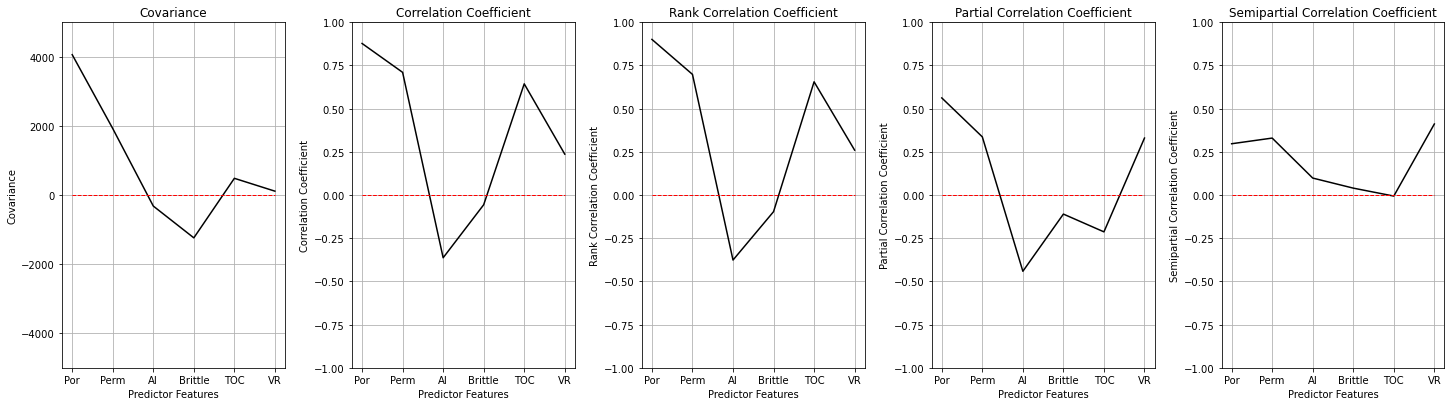

In [26]:
plt.subplot(151)
plt.plot(pred,covariance,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Covariance')
t = plt.title('Covariance')
plt.ylim(-5000,5000)
plt.grid(True)

plt.subplot(152)
plt.plot(pred,correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Correlation Coefficient')
t = plt.title('Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(153)
plt.plot(pred,rank_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Rank Correlation Coefficient')
t = plt.title('Rank Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(154)
plt.plot(pred,partial_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Partial Correlation Coefficient')
t = plt.title('Partial Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(155)
plt.plot(pred,semipartial_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Semipartial Correlation Coefficient')
t = plt.title('Semipartial Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Summarize All Bivariate Metrics 

Let's use heat maps to summarize all the feature pairwise metrics. We calculate the differences to aid in interpretation.

* **partial correlation - correlation** - impact of confounding features on correlation
* **mutual information - correlation** - impact of nonlinearity and heteroscedasticity

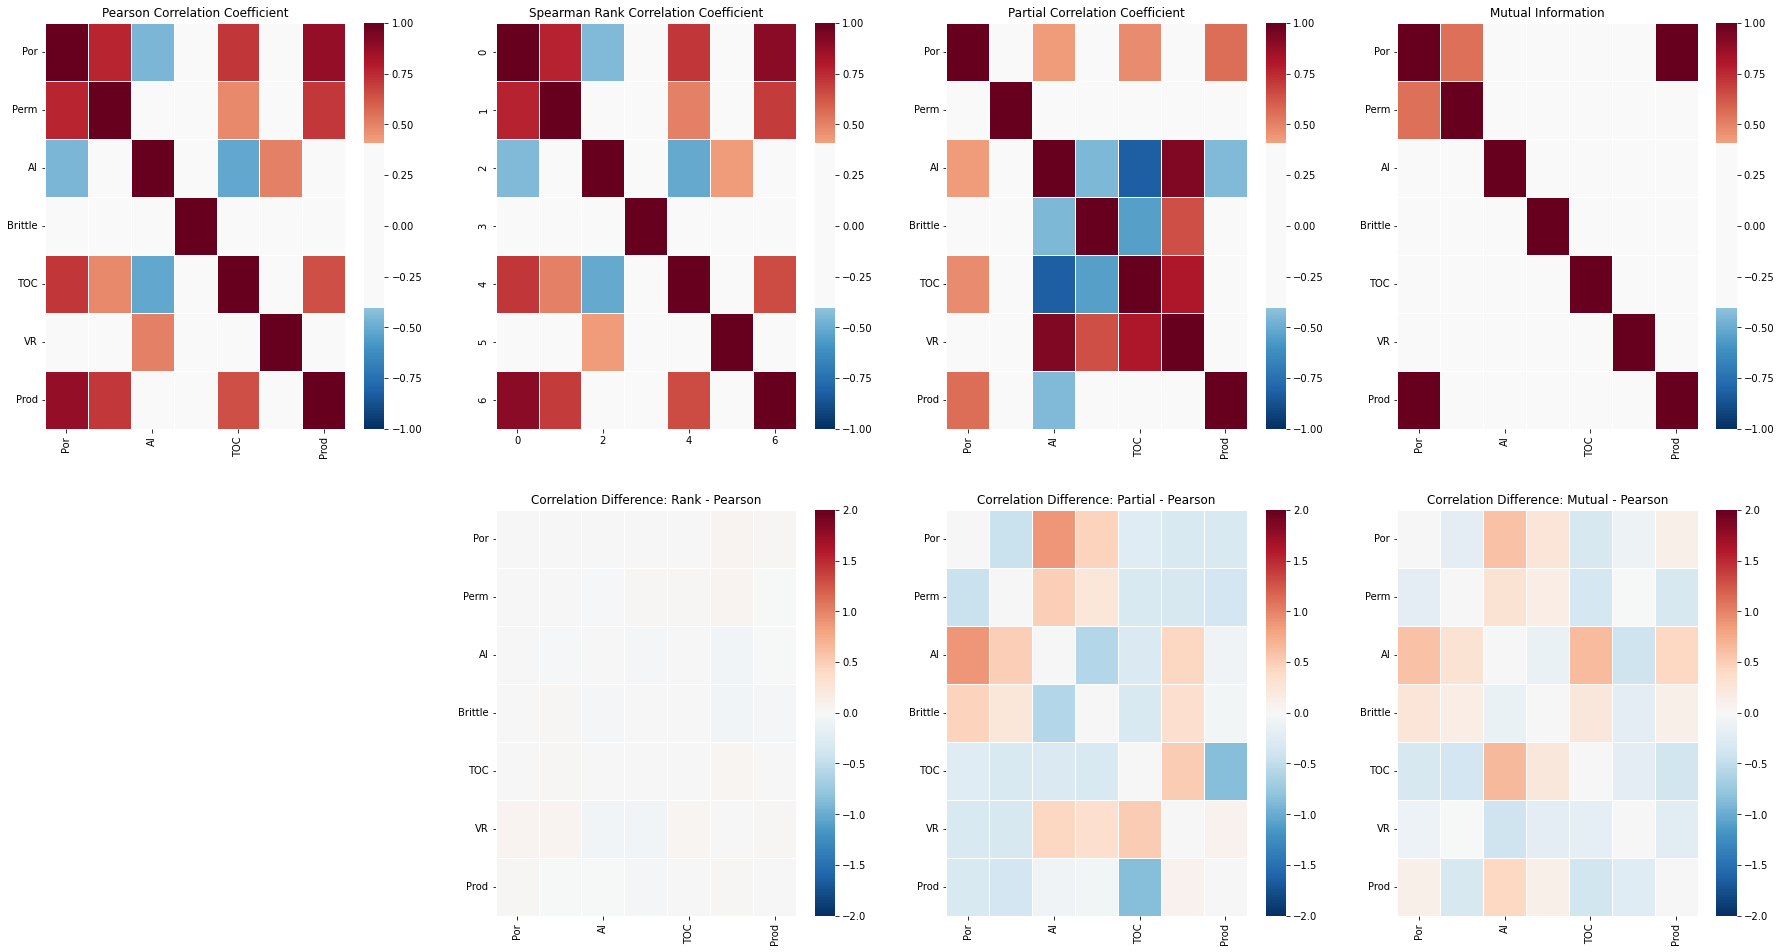

In [27]:
nsample = -1
if nsample > 0:
    df_sample = df.sample(n=nsample)
else: 
    df_sample = df
    
plt.subplot(241)                          # plot a color coded correlation matrix
df_corr = df_sample[features].corr()
sns.heatmap(df_corr,vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f',cmap = signif)
plt.title('Pearson Correlation Coefficient')

plt.subplot(242)                          # plot a color coded correlation matrix
df_rank_corr = stats.spearmanr(df[features])[0]
sns.heatmap(df_rank_corr,vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f',cmap = signif)
plt.title('Spearman Rank Correlation Coefficient')

plt.subplot(243)                          # plot a color coded correlation matrix
partial_correlation_temp = partial_corr(df[features]) # calculate the partial correlation coefficients
df_partial = pd.DataFrame(partial_correlation_temp,columns=features,index=features)
sns.heatmap(df_partial,vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f',cmap = signif)
plt.title('Partial Correlation Coefficient')

plt.subplot(244)
df_mutual = pd.DataFrame(mutual_matrix(df[features],features),columns=features,index=features)
sns.heatmap(df_mutual,vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f',cmap = signif)  
plt.title('Mutual Information')

plt.subplot(246)
sns.heatmap(df_rank_corr-df_corr,vmin = -2.0, vmax = 2.0,linewidths=.5, fmt= '.1f',cmap = plt.cm.RdBu_r)  
plt.title('Correlation Difference: Rank - Pearson')

plt.subplot(247)
sns.heatmap(df_partial-df_corr,vmin = -2.0, vmax = 2.0,linewidths=.5, fmt= '.1f',cmap = plt.cm.RdBu_r)  
plt.title('Correlation Difference: Partial - Pearson')

plt.subplot(248)
plot = sns.heatmap(df_mutual-df_corr,vmin = -2.0, vmax = 2.0,linewidths=.5, fmt= '.1f',cmap = plt.cm.RdBu_r) 
plt.title('Correlation Difference: Mutual - Pearson')

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=3.1, wspace=0.2, hspace=0.2)
plt.show()

I think we are converging on porosity, permeability and vitrinite reflectance as the most important variables with respect to linear relationships with the production.  

### Repeat with Standardization or Normal Score Transform of All Features

Just as a check, let's standardize all the features and repeat the previously calculated quantitative methods. We know this will have an impact on covariance, what about the partial and semipartial correlations?

There is a bunch of code to get this done, but it isn't too complicated. First, lets make a new DataFrame with all variables standardized. Then we can make a minor edit (change the DataFrame name) and reuse the code from above. You can choose between:

1. Afine Correction - scale the distributions to have $\overline{x} = 0$ and $\sigma_x = 1.0$.
2. Normal Score Transform - distribution transform of each feature to standard normal, Gaussian shape with $\overline{x} = 0$ and $\sigma_x = 1.0$.

Use this block to perform affine correction of the features:

In [28]:
# dfS = pd.DataFrame()                      # affine correction of each feature, standardization to a mean of 0 and variance of 1 
# dfS['Well'] = df['Well'].values
# dfS['Por'] = GSLIB.affine(df['Por'].values,0.0,1.0)
# dfS['Perm'] = GSLIB.affine(df['Perm'].values,0.0,1.0)
# dfS['AI'] = GSLIB.affine(df['AI'].values,0.0,1.0)
# dfS['Brittle'] = GSLIB.affine(df['Brittle'].values,0.0,1.0)
# dfS['TOC'] = GSLIB.affine(df['TOC'].values,0.0,1.0)
# dfS['VR'] = GSLIB.affine(df['VR'].values,0.0,1.0)
# dfS['Prod'] = GSLIB.affine(df['Prod'].values,0.0,1.0)
# dfS.head()

Use this block to perform normal score transform of the features:

In [29]:
dfS = pd.DataFrame()                                    # Gaussian transform of each feature, standardization to a mean of 0 and variance of 1 
dfS['Well'] = df['Well'].values
dfS['Por'],d1,d2 = geostats.nscore(df,'Por')
dfS['Perm'],d1,d2 = geostats.nscore(df,'Perm')
dfS['AI'],d1,d2 = geostats.nscore(df,'AI')
dfS['Brittle'],d1,d2 = geostats.nscore(df,'Brittle')
dfS['TOC'],d1,d2 = geostats.nscore(df,'TOC')
dfS['VR'],d1,d2 = geostats.nscore(df,'VR')
dfS['Prod'],d1,d2 = geostats.nscore(df,'Prod')
dfS.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1.0,-0.978237,-0.835874,-0.279880,2.405983,0.293922,1.143844,-1.746955
1,2.0,-0.855141,-0.408651,0.438132,-0.182948,-0.265892,-0.293922,-0.394044
2,3.0,-0.322186,-1.143844,1.746955,1.973953,-0.265892,2.213231,-0.874731
3,4.0,0.708726,1.284621,-0.529045,-0.608266,0.128378,-0.293922,0.816912
4,5.0,0.674490,0.279880,0.350709,-2.847705,1.022696,-0.238069,-0.544610


Regardless of transform that you chose it it good to check the summary statistics.  

In [30]:
dfS.describe()                                          # check the summary statistics

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000,1.860000e+02
mean,101.290323,-0.010721,0.010515,0.010013,1.062360e-04,0.015136,0.016183,1.752184e-03
std,58.769376,1.043835,1.005127,1.000644,1.000303e+00,0.986446,1.000450,9.946115e-01
min,1.000000,-4.988853,-3.337615,-2.759360,-2.847705e+00,-2.213231,-2.877153,-2.457669e+00
25%,51.250000,-0.670284,-0.666124,-0.670284,-6.702838e-01,-0.670284,-0.641027,-6.702838e-01
50%,102.500000,0.006738,0.006738,0.006739,-7.771561e-16,0.020223,0.006738,-7.771561e-16
75%,152.750000,0.670284,0.691506,0.674490,6.702838e-01,0.670284,0.670284,6.702838e-01
max,200.000000,2.783575,2.783575,2.783575,2.783575e+00,2.783575,2.783575,2.783575e+00


We should also check the matrix scatter plot again.

* If you performed normal score transform, you have standardized the mean and variance and correct the univariate shape of the distribution, but the bivariate relationships still depart from Gaussian.

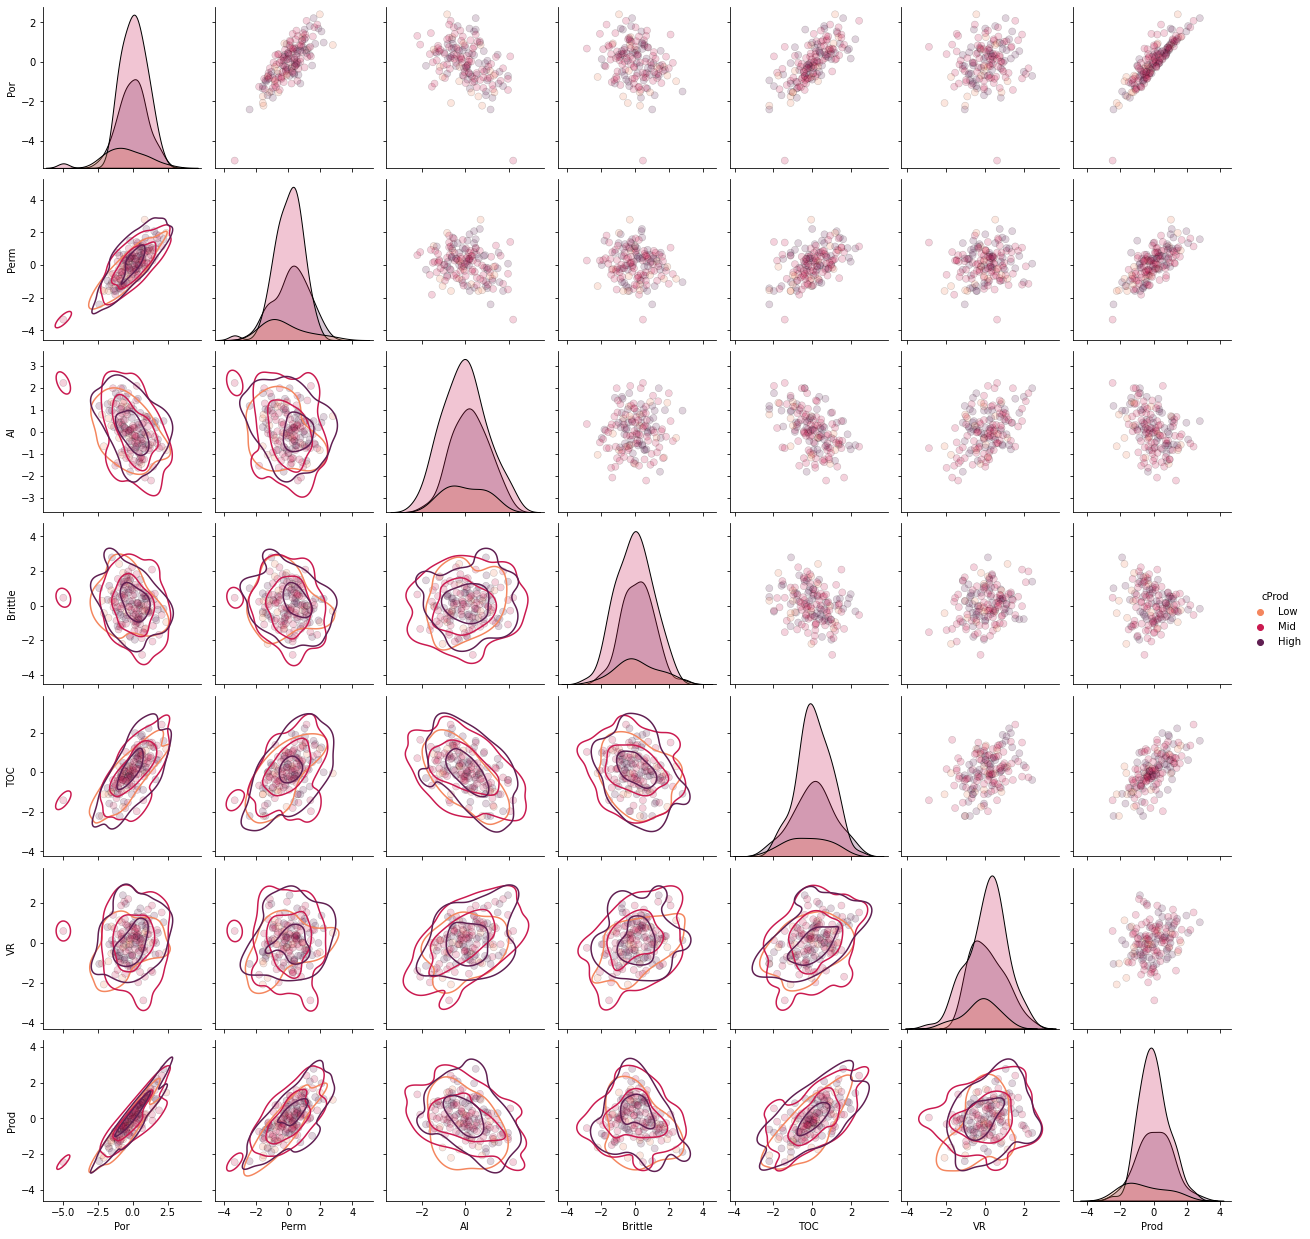

In [31]:
dfS['c' + resp] = pd.cut(x=df[resp], bins=[0, 2000, 4000, 6000], # make a truncated response cateogorical feature
                     labels=['Low', 'Mid', 'High'])

nsample = len(df)                                       # set to less than number of samples for a speed up

dpalette = sns.color_palette("rocket_r",n_colors = 3)   # matrix scatter plot with points and density estimator
palette = sns.color_palette("rocket")
matrixplot = sns.pairplot(dfS.sample(n=nsample),vars=features,hue ='c'+resp,diag_kind = 'kde',palette = dpalette,diag_kws={'edgecolor':'black'},plot_kws=dict(s=50, edgecolor="black", linewidth=0.5,alpha=0.2))
matrixplot.map_lower(sns.kdeplot, levels=3, color="black")
#plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.2, hspace=0.3)
plt.show()

This is the new DataFrame with standardized variables. Now we repeat the previous calculations. We will be more efficient this time and use quite compact code.

In [32]:
stand_covariance = dfS.iloc[:,1:8].cov().iloc[6,:6]
stand_correlation = dfS.iloc[:,1:8].corr().iloc[6,:6]
stand_rank_correlation, stand_rank_correlation_pval = stats.spearmanr(dfS.iloc[:,1:8])
stand_rank_correlation = stand_rank_correlation[:,6][:6]
stand_rank_correlation_pval = stand_rank_correlation_pval[:,6][:6]
stand_partial_correlation = partial_corr(dfS.iloc[:,1:8])
stand_partial_correlation = stand_partial_correlation[:,6][:6]
stand_semipartial_correlation = semipartial_corr(dfS.iloc[:,1:8])
stand_semipartial_correlation = stand_semipartial_correlation[:,6][:6]

and repeat the previous summary plot.

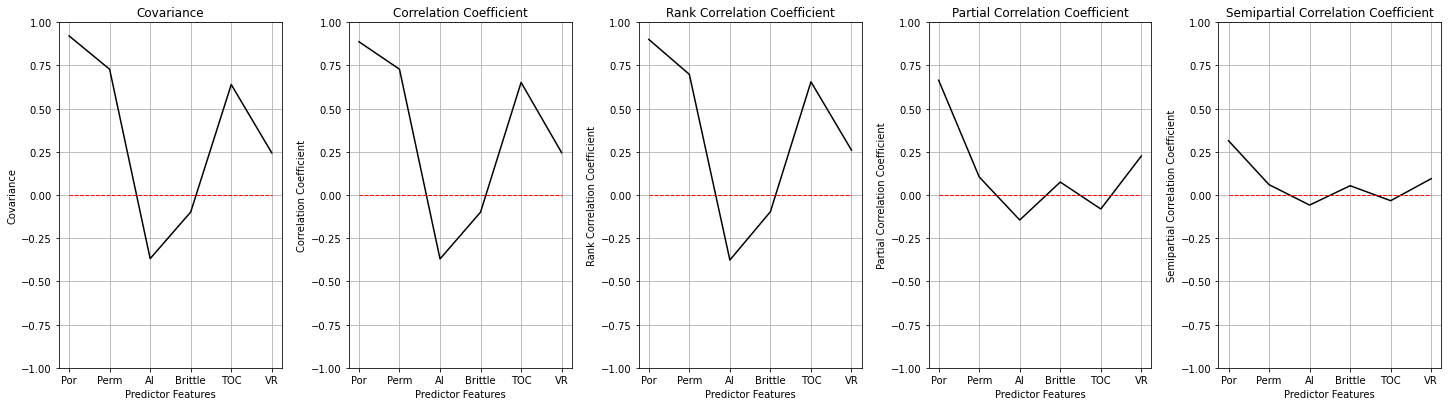

In [33]:
features = df.columns.values[1:][:6]
plt.subplot(151)
plt.plot(features,stand_covariance,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Covariance')
t = plt.title('Covariance')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(152)
plt.plot(features,stand_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Correlation Coefficient')
t = plt.title('Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(153)
plt.plot(features,stand_rank_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Rank Correlation Coefficient')
t = plt.title('Rank Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(154)
plt.plot(features,stand_partial_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Partial Correlation Coefficient')
t = plt.title('Partial Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(155)
plt.plot(features,stand_semipartial_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Semipartial Correlation Coefficient')
t = plt.title('Semipartial Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

What should you observe:

* covariance is now equal to correlation coefficient
* the semipartial correlations are sensitive to the feature standardization (affine correlation or normal score transform).

### Conditional Statistics

We will separate the wells into low, mid and high production and access the difference in the conditional statistics.  

* This will provide a more flexible method to compare the relationship between each feature and production

* If the conditional statistics change significantly then that feature is informative

We are going to make a single violin plot over all of our features

* We need a cateogrical feature for production, we truncate production to High or Low

```python
df['tProd'] = np.where(df['Prod']>=4000, 'High', 'Low') 
```

* We will need to standardize all of our features so we can observe their relative differences together

```python
x = df[['Por','Perm','AI','Brittle','TOC','VR']]
x_stand = (x - x.mean()) / (x.std())      
```
* This code extracted the features into a new DataFrame 'x', then applied the standardization operation on each column (feature)

* Then we add the truncated production feature into the standardized features

```python 
x = pd.concat([df['tProd'],x_stand.iloc[:,0:6]],axis=1)
```

* We can then apply the melt command to unpivot the DataFrame

```python
x = pd.melt(x,id_vars="tProd",var_name="Predictors",value_name='Standardized_Value')
```

* We now have a long DataFrame (6 features x 200 samples = 12000 rows) with:

    * production: Low or High
    * features: Por, Perm, AI, Brittle, TOC or VR
    * standardized feature value
    
We can then build our violin plot 

* x is our predictor features
* y is the standardized values for the predictor features (all now in one column)
* hue is the production level High or Low
* split is True so the violins are split in half
* inner is quartiles for P25, P50 and P75 are plotted as dashed lines

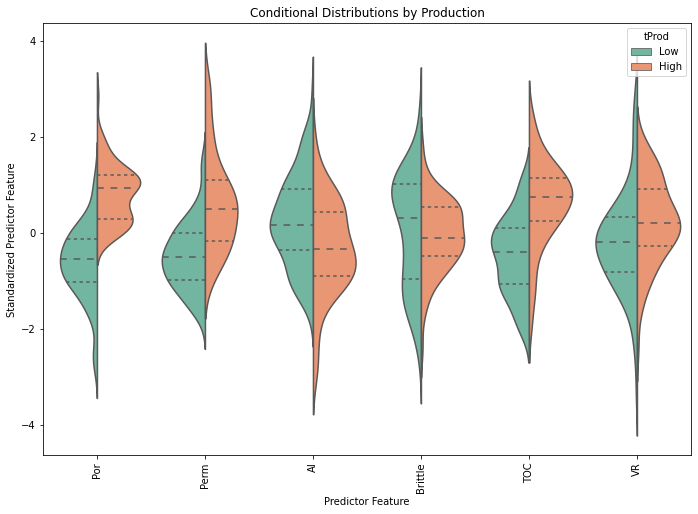

In [34]:
df['tProd'] = np.where(df['Prod']>=4000, 'High', 'Low') # make a high and low production categorical feature

x_temp = df[pred]
x_temp_stand = (x_temp - x_temp.mean()) / (x_temp.std())                    # standardization by feature
x_temp = pd.concat([df['tProd'],x_temp_stand.iloc[:,0:6]],axis=1) # add the production categorical feature to the DataFrame
x_temp = pd.melt(x_temp,id_vars="tProd",var_name="Predictor Feature",value_name='Standardized Predictor Feature') # unpivot the DataFrame

plt.subplot(111)
sns.violinplot(x="Predictor Feature", y="Standardized Predictor Feature", hue="tProd", data=x_temp,split=True, inner="quart", palette="Set2")
plt.xticks(rotation=90); plt.title('Conditional Distributions by Production')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

From the violin plot we can observe that the conditional distributions of porosity, permeability, TOC have the most variation between low and high production wells.

We can replace the plot with box and whisker plots of the conditional distributions.  

* Box and whisker plots improve our ability to observe outliers

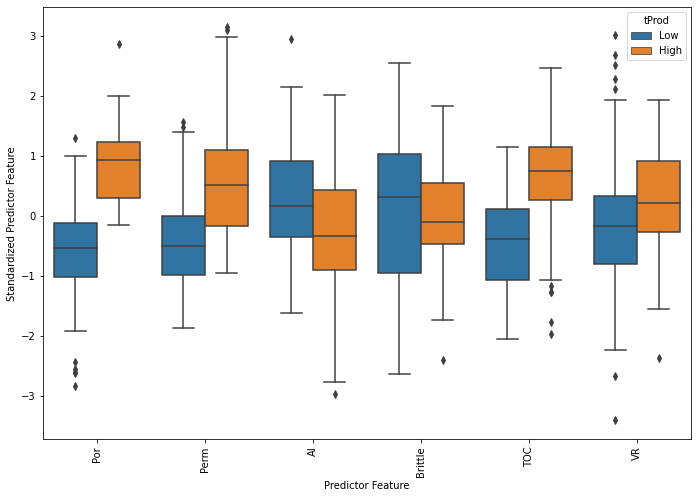

In [35]:
plt.subplot(111)
sns.boxplot(x="Predictor Feature", y="Standardized Predictor Feature", hue="tProd", data=x_temp)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

df = df.drop(['tProd'], axis = 1)

From the conditional box plot we can observe that the conditional distributions of porosity, permeability, TOC have the most variation between low and high production wells.

* We can observed the outliers in porosity, permeability (upper tail), total organic carbon (lower tail) and vitrinite reflectance. 

### Variance Inflation Factor (VIF)

A measure of linear multicolinearity between a predictor feature ($X_i$) a nd all other predictor features ($X_j, \forall j \ne i$).

First we calculate a linear regression for a predictor feature given all the other predictor features.

\begin{equation}
X_i = \sum_{j, j \ne i}^m X_j + \epsilon
\end{equation}

From this model we determin the coefficient of determination, $R^2$, known as variance explained.

Then we calculate the Variance Inflation Factor as:

\begin{equation}
VIF = \frac{1}{1 - R^2}
\end{equation}

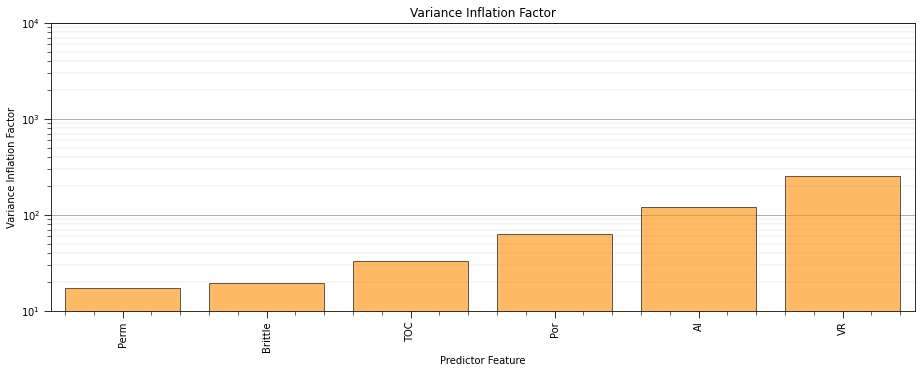

In [36]:
vif_values = []
for i in range(x.shape[1]):
    vif_values.append(variance_inflation_factor(x.values, i))

vif_values = np.asarray(vif_values)
indices = np.argsort(vif_values)[::1]                  # find indicies for descending order

plt.subplot(111)                                        # plot the feature importance 
plt.title("Variance Inflation Factor")
plt.bar(range(x.shape[1]), vif_values[indices],edgecolor = 'black',
       color="darkorange",alpha=0.6, align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90); 

plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

plt.xlim([-0.5, x.shape[1]-0.5]); plt.yscale('log'); plt.ylim([1.0e1,1.0e4])
plt.xlabel('Predictor Feature'); plt.ylabel('Variance Inflation Factor')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5)
plt.show()

## Model-based Feature Ranking 

With these methods we evaluate the performance of the features in building an actual predictive model. Let's start with $B$ coefficients.

### Ranking Method - $B$ Coefficients / Beta Weights 

We could also consider $B$ coefficients.  These are the linear regression coefficients without standardization of the variables. Let's use the linear regression method that is available in the SciPy package.

The estimator for $Y$ is simply the linear equation:

\begin{equation}
Y^* = \sum_{i=1}^{m} b_i X_i + c
\end{equation}

The $b_i$ coefficients are solved to minimize the squared error between the estimates, $Y^*$ and the values in the training dataset, $Y$.

In [37]:
reg = LinearRegression()
reg.fit(dfS[pred],dfS[resp])
b = reg.coef_
print(b)

[ 0.76034369  0.07777846 -0.15372873  0.04430208 -0.08619259  0.23305789]


The ouput is the $b$ coefficients, ordered over our features from $b_i, i = 1,\ldots,n$ and then the intercept, $c$, that I have removed to avoid confusion.

* we see the negative contribution of AI and TOC
* the results are very sensitive to the magnitudes of the variances of the predictor features. 

We can remove this sensitivity by working with standardized features.

### Ranking Method - $\beta$ Coefficients / Beta Weights 

$\beta$ coefficients are calculated as the linear regression of the coefficients after we have standardized the predictor and response features to have a variance of one.  

\begin{equation}
\sigma^2_{X^s_i} = 1.0 \quad \forall \quad i = 1,\ldots,m, \quad \sigma^2_{Y^s} = 1.0
\end{equation}

The estimator for $Y^s$ standardized is simply the linear equation:

\begin{equation}
Y^{s*} = \sum_{i=1}^{m} \beta_i X^s_i + c
\end{equation}

It is convenient that we have just standardized all our variables to have a variance of 1.0 just recently (see above). Let's use the same linear regression method again on the standardized features to get $\beta$ coefficients.

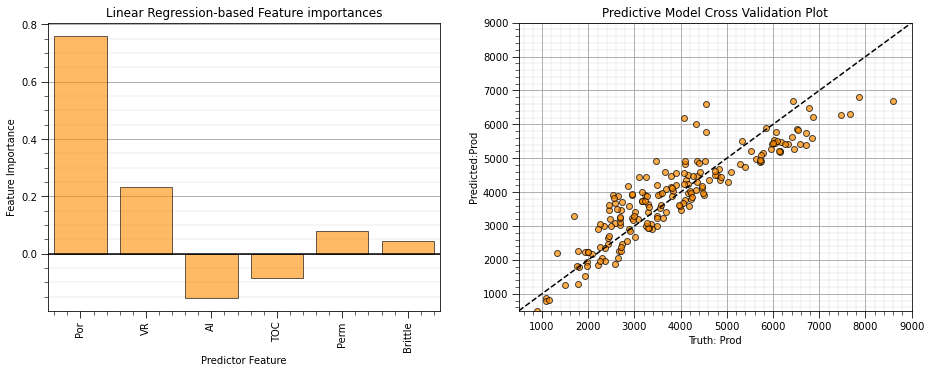

In [38]:
linear = LinearRegression()
linear.fit(dfS[features],Y)
beta = reg.coef_
y_hat = linear.predict(dfS[features])

indices = np.argsort(np.abs(beta))[::-1]             # find indicies for descending order

plt.subplot(121)                                        # plot the feature importance 
plt.title("Linear Regression-based Feature importances")
plt.bar(range(x.shape[1]), beta[indices],edgecolor = 'black',
       color="darkorange",alpha = 0.6, align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-0.5, x.shape[1]-0.5]); 
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
#plt.ylim([0.,1.0])
plt.plot([-0.5,5.5],[0,0],color='black')
plt.xlabel('Predictor Feature'); plt.ylabel('Feature Importance')

plt.subplot(122)                                         # model cross validation plot
plt.scatter(Y,y_hat,color='darkorange',edgecolor='black',alpha=0.7)
plt.grid(visible=True,which='both',axis='both')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5)); plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().xaxis.grid(True, which='major',linewidth = 1.0); plt.gca().xaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.xlim([Ymin,Ymax]); plt.ylim([Ymin,Ymax]); plt.xlabel('Truth: ' + response); plt.ylabel('Predicted:' + response)
plt.plot([Ymin,Ymax],[Ymin,Ymax],color='black',ls='--'); plt.title('Predictive Model Cross Validation Plot')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5); plt.show()

Some observations:

* the change between $b$ and $\beta$ coefficients is not just a constant scaling

* porosity, acoustic impedance and total organic carbon have the great weight in the estimate of production

### Ranking Method - Feature Importance

A variety of machine learning methods provide measures of feature importance.  

* for exaple decision trees track the reduction in mean square error through inclusion of each feature

Let's look at the feature importance from a random forest regressor fit to our data.

* We will instantiate a random forest with default hyperparameters. This results in unlimited complexity, over-trained trees in our forest. The averaging of these trees takes care of the overfit issue.

* Then we will train our random forest and extract the importances (expectation over all the trees)

* we can also extract the feature importances over all the trees in the forest and summarize with the standard deviation to access the robustness of our feature importance measure

For more information check out my lecture on [random forest](https://www.youtube.com/watch?v=m5_wk310fho&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=39) predictive machine learning.

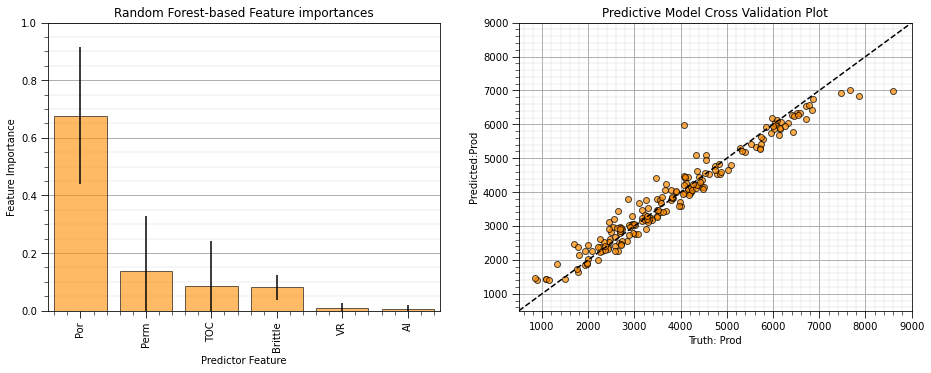

In [39]:
# Code modified from https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
seed = 73093                                                # set the random forest hyperparameters
max_depth = 7
min_samples_leaf = 5
num_tree = 1000
max_features = 4
random_forest = RandomForestRegressor(min_samples_leaf = min_samples_leaf,random_state=seed,n_estimators=num_tree, max_features=max_features)
random_forest.fit(x,Y) # fit the random forest
y_hat = random_forest.predict(x)
importance_rank = random_forest.feature_importances_ # extract the expected feature importances
importance_rank_stand = importance_rank/np.max(importance_rank)                          # calculate relative mutual information

std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],axis=0) # calculate stdev over trees
indices = np.argsort(importance_rank)[::-1]             # find indicies for descending order

plt.subplot(121)                                        # plot the feature importance 
plt.title("Random Forest-based Feature importances")
plt.bar(range(x.shape[1]), importance_rank[indices],edgecolor = 'black',
       color="darkorange",alpha = 0.6, yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-0.5, x.shape[1]-0.5]); 
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.ylim([0.,1.0])
plt.xlabel('Predictor Feature'); plt.ylabel('Feature Importance')

plt.subplot(122)                                         # model cross validation plot
plt.scatter(Y,y_hat,color='darkorange',edgecolor='black',alpha=0.7)
plt.grid(visible=True,which='both',axis='both')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5)); plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().xaxis.grid(True, which='major',linewidth = 1.0); plt.gca().xaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.xlim([Ymin,Ymax]); plt.ylim([Ymin,Ymax]); plt.xlabel('Truth: ' + response); plt.ylabel('Predicted:' + response)
plt.plot([Ymin,Ymax],[Ymin,Ymax],color='black',ls='--'); plt.title('Predictive Model Cross Validation Plot')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5); plt.show()

There is more we can do with model-based methods. We will actually test models to assess the incremental impact of each predictor feature! We will try this with recursive feature elimination.

Let's plot the results from the $B$ and $\beta$ coefficients and compare with the previous results.

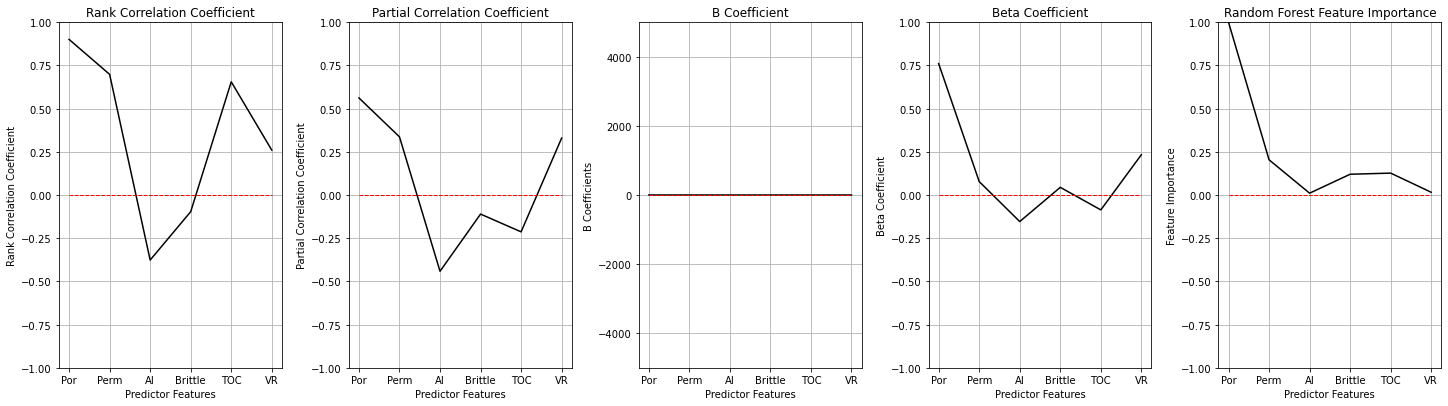

In [40]:
plt.subplot(151)
plt.plot(features,rank_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Rank Correlation Coefficient')
t = plt.title('Rank Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(152)
plt.plot(pred,partial_correlation,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Partial Correlation Coefficient')
t = plt.title('Partial Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(153)
plt.plot(features,b[0:6],color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('B Coefficients')
t = plt.title('B Coefficient')
plt.ylim(-5000,5000)
plt.grid(True)

plt.subplot(154)
plt.plot(features,beta[0:6],color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Beta Coefficient')
t = plt.title('Beta Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(155)
plt.plot(features,importance_rank_stand,color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Feature Importance')
t = plt.title('Random Forest Feature Importance')
plt.ylim(-1,1.0)
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

### Mutual Information

Mutual information is a generalized approach that quantifies the mutual dependence between two features.  

* quantifies the amount of information gained from observing one feature about the other

* avoids any assumption about the form of the relationship (e.g. no assumption of linear relationship)

* compares the joint probabilities to the product of the marginal probabilities

For discrete or binned continuous features $X$ and $Y$, mutual information is calculated as:

\begin{equation}
I(X;Y) = \sum_{y \in Y} \sum_{x \in X}P_{X,Y}(x,y) log \left( \frac{P_{X,Y}(x,y)}{P_X(x) \cdot P_Y(y)} \right)
\end{equation}

recall for indepedence:

\begin{equation}
P_{X,Y}(x,y) = P_X(x) \cdot P_Y(y)
\end{equation}

therefore if the two features are independent then the $log \left( \frac{P_{X,Y}(x,y)}{P_X(x) \cdot P_Y(y)} \right) = 0$

The joint probability $P_{X,Y}(x,y)$ is a weighting term on the sum and enforces closure.

* parts of the joint distribution with greater density have greater impact on the mutual information metric

For continuous (and nonbinned) features we can applied the integral form.

\begin{equation}
I(X;Y) = \int_{Y} \int_{X}P_{X,Y}(x,y) log \left( \frac{P_{X,Y}(x,y)}{P_X(x) \cdot P_Y(y)} \right) dx dy
\end{equation}

We get a sorted list of the indices in decreasing order of importance with the command

```python
indices = np.argsort(importances)[::-1]
```

the slice reverses the order, for descending order of importance.

Feature ranking:
1. feature Por = 1.000000
2. feature Perm = 0.382740
3. feature TOC = 0.263181
4. feature Brittle = 0.059389
5. feature AI = 0.050784
6. feature VR = 0.004904


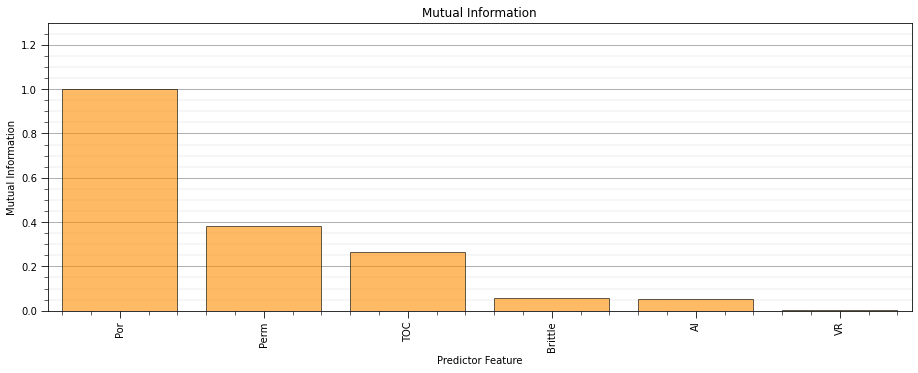

In [41]:
x = df.iloc[:,[1,2,3,4,5,6]]                            # separate DataFrames for predictor and response features
y = df.iloc[:,[7]]

mi = mutual_info_regression(x,np.ravel(y))              # calculate mutual information
mi /= np.max(mi)                                        # calculate relative mutual information

indices = np.argsort(mi)[::-1]                          # find indicies for descending order

print("Feature ranking:")                               # write out the feature importances
for f in range(x.shape[1]):
    print("%d. feature %s = %f" % (f + 1, x.columns[indices][f], mi[indices[f]]))

plt.subplot(111)                                        # plot the relative mutual information 
plt.title("Mutual Information")
plt.bar(range(x.shape[1]), mi[indices],edgecolor = 'black',
       color="darkorange",alpha=0.6,align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-0.5, x.shape[1]-0.5]); plt.ylim([0,1.3])
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.xlabel('Predictor Feature'); plt.ylabel('Mutual Information')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5)
plt.show()


#### Mutual Information Accounting For Relevance and Redundancy

The standard Maximum Relevance - Minumum Redundancy (MRMR) objective function considers a subset of predictor features, i.e., to score predictor feature subsets as metric to identify the most informative subset of predictor features.

* the approach calculates the average mutual information between the subset of predictor features and the response feature minus the average mutual information between the subset of predictor features.

\begin{equation}
MID = \frac{1}{|S|}{\sum_{\alpha \in S} I(X_{\alpha},Y) } - \frac{1}{|S|^2} {\sum_{\alpha \in S}^m \sum_{\beta \in S}^m I(X_{\alpha},X_{\beta})}
\end{equation}

as a measure of $relevance - redundancy$ or 

\begin{equation}
MIQ = \frac{ \frac{1}{|S|}{\sum_{\alpha \in S}^m I(X_{\alpha},Y) } }{ \frac{1}{|S|^2} {\sum_{\alpha \in S}^m \sum_{\beta \in S}^m I(X_{\alpha},X_{\beta})} }
\end{equation}

* as a measure of $\frac{relevance}{redundancy}$.

I propose that for one-at-a-time predictor feature ranking (predictor feature subset, $S = [X_i]$ and $|S| = 1$) we modify this to the following calculation:

* **relevance** - the mutual information between the selected predictor feature, $X_i$, and the response feature, $Y$
* **redudancy** - the average mutual information between the selected predictor feature, $X_i$, and the remaining predictor features, $X_{\alpha}, \alpha \ne i$.
* we use the quotient form of the calculation from Gulgezen, Cataltepe and Yu (2009).

Our modified version of the Maximum Relevance - Minumum Redundancy (MRMR) objective function for one-at-a-time feature ranking scores the selected predictor feature $X_i$'s **relavance** as its mutual information with the response feature:

\begin{equation}
I(X_i,Y)
\end{equation}

and **redundancy** between the selected predictor feature, $X_i$, and the remaining predictor features:

\begin{equation}
\frac{1}{|S|-1} \sum_{\alpha=1, \alpha \ne i}^m I(X_i,X_{\alpha})
\end{equation}

were $X$ are predictor features, $Y$ is the response feature, $X_i$ is the specific predictor feature being scored and $|S|$ is the number of predictor features and $I()$ is mutual information between the indicated features.

\begin{equation}
\Phi(X_i,Y) = \frac{ I(X_i,Y) }{ \frac{1}{|S|-1} \sum_{\alpha=1, \alpha \ne i}^m I(X_i,X_{\alpha})}
\end{equation}

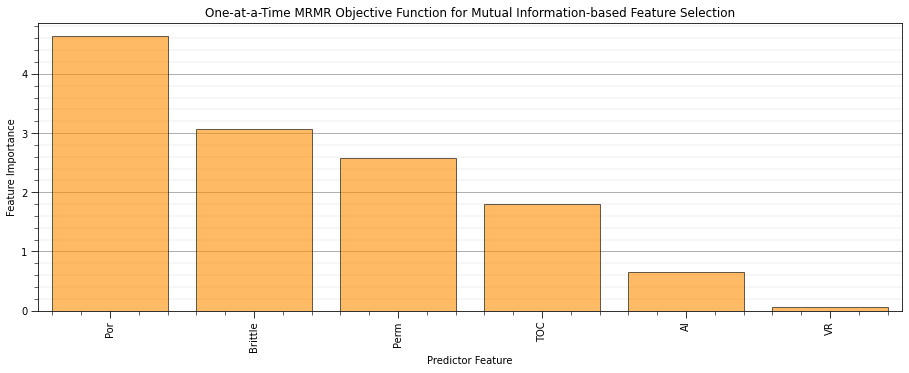

In [42]:
obj_mutual = mutual_information_objective(x,Y)
indices_obj = np.argsort(obj_mutual)[::-1] # find indicies for descending order

plt.subplot(111)                          # plot the relative mutual information 
plt.title("One-at-a-Time MRMR Objective Function for Mutual Information-based Feature Selection")
plt.bar(range(x.shape[1]), obj_mutual[indices_obj],
       color="darkorange",alpha = 0.6, align="center",edgecolor="black")
plt.xticks(range(x.shape[1]), x.columns[indices_obj],rotation=90)
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.xlim([-0.5, x.shape[1]-0.5]); plt.xlabel('Predictor Feature'); plt.ylabel('Feature Importance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5)
plt.show()

#### Delta Mutual Information Quotient Accounting for Relevance and Redundancy

We use the mutual information quotient from Gulgezen, Cataltepe and Yu (2009).

The standard MRMR objective function that scores the subset of features' **relavance** between the subset of predictor features and the response feature:

\begin{equation}
\frac{1}{|S|}{\sum_{\alpha=1}^m I(X_{\alpha},Y) } 
\end{equation}

and **redundancy** between the the subset of predictor features:

\begin{equation}
\frac{1}{|S|^2} {\sum_{\alpha=1}^m \sum_{\beta=1}^m I(X_{\alpha},X_{\beta})}
\end{equation}

To find the most informative subset of predictor features we must find the subset of features that maximize relevance while minimizing redundacy. We can accomplish this by mazimizing either of these two formulations.

\begin{equation}
MID = \frac{1}{|S|}{\sum_{\alpha=1}^m I(X_{\alpha},Y) } - \frac{1}{|S|^2} {\sum_{\alpha=1}^m \sum_{\beta=1}^m I(X_{\alpha},X_{\beta})}
\end{equation}

or 

\begin{equation}
MIQ = \frac{ \frac{1}{|S|}{\sum_{\alpha=1}^m I(X_{\alpha},Y) } }{ \frac{1}{|S|^2} {\sum_{\alpha=1}^m \sum_{\beta=1}^m I(X_{\alpha},X_{\beta})} }
\end{equation}

I suggest feature ranking through the calculation of the change in $MIQ$ via inclusion and removal of a specific predictor feature ($X_i$).

\begin{equation}
\Delta MIQ_i = \frac{ \frac{1}{|S|}{\sum_{\alpha=1}^m I(X_{\alpha},Y) } }{ \frac{1}{|S|^2} {\sum_{\alpha=1}^m \sum_{\beta=1}^m I(X_{\alpha},X_{\beta})} } - \frac{ \frac{1}{|S|}{\sum_{\alpha=1,\alpha \ne i}^m I(X_{\alpha},Y) } }{ \frac{1}{|S|^2} {\sum_{\alpha=1,\alpha \ne i}^m \sum_{\beta=1,\beta \ne i}^m I(X_{\alpha},X_{\beta})} }
\end{equation}

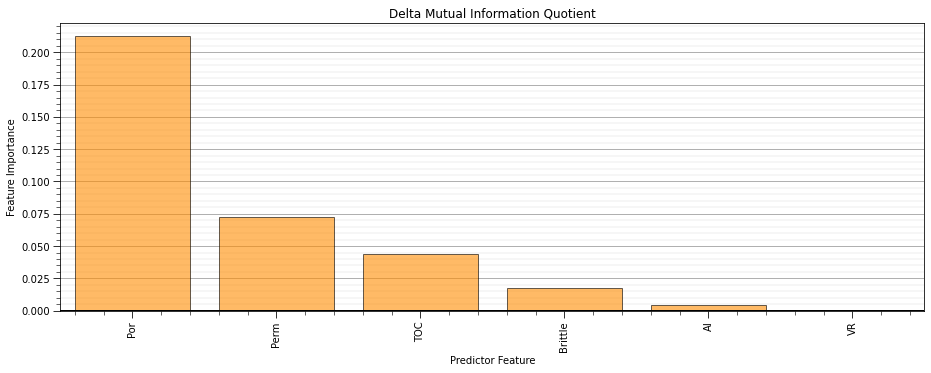

In [43]:
delta_mutual_information = delta_mutual_information_quotient(x,Y)

#delta_mutual_information = (delta_mutual_information - np.min(delta_mutual_information))/(np.max(delta_mutual_information) - np.min(obj_mutual))
indices_delta_mutual_information = np.argsort(delta_mutual_information)[::-1]            # find indicies for descending order

plt.subplot(111)                          # plot the relative mutual information 
plt.title("Delta Mutual Information Quotient")
plt.bar(range(x.shape[1]), delta_mutual_information[indices_delta_mutual_information],
       color="darkorange",alpha = 0.6,align="center",edgecolor = 'black')
plt.xticks(range(x.shape[1]), x.columns[indices_delta_mutual_information],rotation=90)
plt.xlim([-0.5, x.shape[1]-0.5])
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.plot([-0.5,x.shape[1]-0.5],[0,0],color='black',lw=3); plt.xlabel('Predictor Feature'); plt.ylabel('Feature Importance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5)
plt.show()

#### Compare Delta Mutual Information and Variance Inflation Factor

Both of these methods account for predictor feature redundancy

* VIF assumes linearity and does not account for relevance

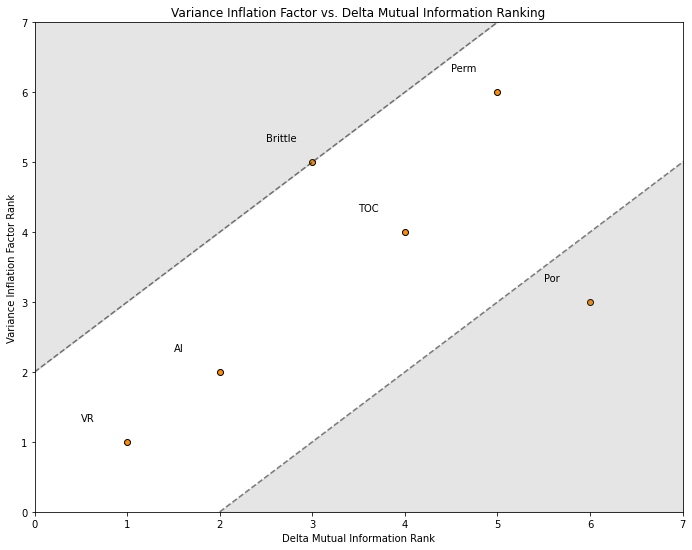

In [44]:
plt.scatter(stats.rankdata(delta_mutual_information),stats.rankdata(-vif_values),c='darkorange',edgecolor='black')
for i, feature in enumerate(x.columns):
    plt.annotate(feature, (stats.rankdata(delta_mutual_information)[i]-0.5,stats.rankdata(-vif_values)[i]+0.3))
plt.xlabel('Delta Mutual Information Rank'); plt.ylabel('Variance Inflation Factor Rank'); plt.title('Variance Inflation Factor vs. Delta Mutual Information Ranking')
plt.xlim(0,len(x.columns)+1); plt.ylim(0,len(x.columns)+1)
plt.plot([2,8],[0,6],color='black',alpha=0.5,ls='--'); 
plt.plot([0,6],[2,8],color='black',alpha=0.5,ls='--')
#plt.annotate('Nonlinearity Reduces Rank',(1,11),c='grey',rotation = 36,fontsize = 15)
#plt.annotate('or Relevance Reduces Rank',(3,10),c='grey',rotation = 36,fontsize = 15)
plt.fill_between([0,6], [2,8], [8,8], color='grey',alpha=0.2,zorder=1)
#plt.annotate('Nonlinearity Increases Range',(10,3),c='grey',rotation = 36,fontsize = 15)
#plt.annotate('or Relevance Increases Rank',(11,1),c='grey',rotation = 36,fontsize = 15)
plt.fill_between([2,8], [0,6], [0,0], color='grey',alpha=0.2,zorder=1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.1, hspace=0.5)
plt.show()

From mutual information we can observe that porosity, permeability then totoal organic carbon adn brittleness have the greatest departure from general independence.  



We have a wide array of criteria to rank our features.  

* the $B$ coefficient have the same issue as covariance, sensitivity to the univariate variance

* the $\beta$ coefficients remove this sensitivity and are consistent with previous results.

Given all of these methods, I would rank the variables as:

1. Porosity
2. Vitrinite Reflectance
3. Acoustic Impedance
4. Permeability
5. Total Organic Carbon
6. Brittleness

I have assigned these ranks by observing the general trend in these matrics.  Of course, we could make a more quantitative score and rank by weighting each method.

As mentioned before, we should not neglect expert knowledge. If additional information is known about physical processes, causation, and reliability and availability of variables this should be integrated into assigning ranks.

We include a bonus method here, recursive feature elimination, but only provide a simple linear regression model example. More could be done with more complicated models.

### Ranking Method - Recursive Feature Elimination 

Recursive Feature Elimination (RFE) method works by recursively removing features and building a model with the remaining features.

* for the first step, all features are used to build a model and the features are ranked by feature importance or the coeficient

* the least important feature is pruned and the model is rebuilt

* this is repeated until there is only one feature remaining

In this code we make a prediction model based on multilinear regression and indicate that we want to find the best feature based on recursive feature elimination. The algorithm assigns rank $1,\ldots,m$ for all features.

In [45]:
rfe = RFE(LinearRegression(),n_features_to_select=1,verbose=0) # set up RFE linear regression model
df['const'] = np.ones(len(df))            # let's add one's for the constant term
rfe = rfe.fit(df[pred].values,np.ravel(df[resp])) # recursive elimination
dfS = df.drop('const',axis = 1)           # remove the ones
print(rfe.ranking_[0:6])                  # print the variable ranks

[4 5 3 6 1 2]


The recursive feature elimination method with a linear regression model provides these ranks:

1. Total Organic Carbon
2. Vitrinite Reflectance
3. Acoustic Impedance
4. Porosity
5. Permeability
6. Brittleness

The advantages with the recursive elimination method:

* the actual model can be used in assessing feature ranks
* the ranking is based on accuracy of the estimate

but this method is sensitive to:

* choice of model
* training dataset

The feature ranks are quite different from our previous methods.  Many have moved from the previous assessment. Perhaps we should use a more flexible modeling method.

Let's repeat this method with a more flexible machine learning method, decision tree regressor.

In [46]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')            

rfe = RFE(RandomForestRegressor(max_depth=3),n_features_to_select=1,verbose=0)      # set up RFE linear regression model
df['const'] = np.ones(len(df))                        # let's add one's for the constant term

lab_enc = preprocessing.LabelEncoder(); Y_encoded = lab_enc.fit_transform(Y)

rfe = rfe.fit(x,np.ravel(Y_encoded))                  # recursive elimination
dfS = df.drop('const',axis = 1)                       # remove the ones
print(rfe.ranking_[0:6])                              # print the variable ranks

[1 5 6 2 4 3]


The recursive feature elimination method with a linear regression model provides these ranks:

1. Porosity
2. Brittleness
3. Vitrinite Reflectance
4. Permeability
5. Total Organic Carbon
6. Acoustic Impedance

This method may be applied with cross validation (k fold iteration of training and testing datasets).  



#### Comments

This was a basic demonstration of multivariate feature ranking. A lot more could be done:  

* recursive feature elimination with more complicated models and cross validation
* principal components analysis for feature selection (mean of component loadings over all principal components for each feature)
* consideration of the spatial context of the data
* statistical testing, assignment of statistical significance and use of p-values

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
